# 10장 분산분석

## 10.2 일원분산분석
### 분석 시나리오

A쇼핑 고객들의 구매유형별 총 매출액의 차이가 있는지를 일원분산분석을 통해 검정해 보고자 한다. A쇼핑에서 관리하는 고객들의 구매유형과 고객 수는 다음과 같다.
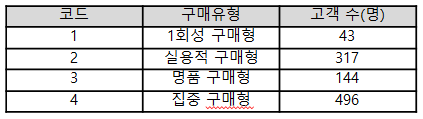
이를 위한 가설은 다음과 같다. 

#### H0 (귀무가설)= A쇼핑 고객의 구매유형에 따른 총 매출액의 차이는 없다.
#### H1 (연구가설)= A쇼핑 고객은 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재한다.

In [1]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import scipy as sp
import numpy as np
import pingouin as pg
import scikit_posthocs
df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
df1=df[['구매유형','총_매출액']]
pd.options.display.float_format = '{:.3f}'.format
#2. 등분산 검정
구매유형 = [ ]
for i in range(1,5,1):
    구매유형.append(df1[df1.구매유형==i].총_매출액)
sp.stats.levene(구매유형[0],구매유형[1], 구매유형[2], 구매유형[3])

LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

In [2]:
#1. Welch 일원분산분석 
print(pg.welch_anova(dv='총_매출액', between='구매유형', data=df1))

#2. 사후분석
df1['구매유형']=df1['구매유형'].astype(str)
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형'))

#3. 구매유형별 평균 총매출액
print(구매유형[0].mean(),구매유형[1].mean(),구매유형[2].mean(),구매유형[3].mean())

  Source  ddof1   ddof2      F  p-unc
0   구매유형      3 230.936 88.238  0.000
       1      2      3      4
1 -1.000  0.000  0.000  0.805
2  0.000 -1.000  0.008  0.000
3  0.000  0.008 -1.000  0.000
4  0.805  0.000  0.000 -1.000
3403682.3255813955 9612645.078864353 11779839.652777778 4392794.395161291


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## 10.3 이원분산분석
### 분석 시나리오

이번에는 구매유형과 거주지역에 따라 고객들의 총 매출액이 다른지 검정해 보자 한다. 이원분산분석의 가설은 제1 독립변수의 효과, 제2 독립변수의 효과, 그리고 상호작용 효과에 대해 논하는 가설로 분리하여 설정하는 것이 바람직하다.

### ① 구매유형에 따른 매출액 차이 가설
#### H0 (귀무가설)= 구매유형에 따른 총 매출액의 차이는 없다.
#### H1 (연구가설)= 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재한다.

### ② 거주지역에 따른 매출액 차이 가설
#### H0 (귀무가설)= 거주지역에 따른 총 매출액의 차이는 없다.
#### H1 (연구가설)= 적어도 1개의 거주지역이 다른 거주지역과 총 매출액 차이가 존재한다.

### ③ 독립변수간 상호작용에 대한 가설
#### H0 (귀무가설)= 구매유형과 거주지역의 상호작용 효과는 없다.
#### H1 (연구가설)= 구매유형과 거주지역의 상호작용 효과가 있다.


In [3]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import scipy as sp
import numpy as np
import pingouin as pg
import scikit_posthocs
df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
df1=df[['총_매출액','구매유형','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

#2. 이원분산분석
print(pg.anova(dv='총_매출액', between=['구매유형','거주지역'], data=df1))

#3. 사후분석
df1['구매유형']=df1['구매유형'].astype(str)
df1['거주지역']=df1['거주지역'].astype(str)
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형'))
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='거주지역'))

#4. 구매유형, 거주지역별 평균 총 매출액
pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)

        Source                    SS      DF                   MS      F  \
0         구매유형  6223216931461960.000   3.000 2074405643820653.250 63.079   
1         거주지역 16140405705054362.000   6.000 2690067617509060.500 81.801   
2  구매유형 * 거주지역  3867936213048852.000  18.000  214885345169380.688  6.534   
3     Residual 32096439113329668.000 976.000   32885695812837.773    nan   

   p-unc   np2  
0  0.000 0.162  
1  0.000 0.335  
2  0.000 0.108  
3    nan   nan  
       1      2      3      4
1 -1.000  0.000  0.000  0.805
2  0.000 -1.000  0.008  0.000
3  0.000  0.008 -1.000  0.000
4  0.805  0.000  0.000 -1.000
       1      2      3      4      5      6      7
1 -1.000  1.000  1.000  1.000  1.000  0.988  0.412
2  1.000 -1.000  1.000  0.980  0.965  0.339  0.000
3  1.000  1.000 -1.000  0.978  0.935  0.019  0.000
4  1.000  0.980  0.978 -1.000  1.000  0.008  0.000
5  1.000  0.965  0.935  1.000 -1.000  0.002  0.000
6  0.988  0.339  0.019  0.008  0.002 -1.000  0.000
7  0.412  0.000  0.000  0.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,nan,3281350.000,3002825.000,3041428.182,3637031.667,3712146.667,3864880.000
2,nan,nan,4215648.571,8278686.562,6590330.674,10226770.763,13513839.437
3,4906400.000,3215055.000,6809777.143,7965439.677,11046081.250,13768678.750,25451441.176
4,nan,4034175.556,3720989.697,4229915.000,4272964.468,4749139.200,5138468.276


## 10.4 다변량분산분석
### 분석 시나리오

A쇼핑에서는 다변량분산분석을 통해 구매유형, 거주지역에 따라 방문빈도 및 총 매출액의 차이를 검정하려 한다. 이러한 문제해결을 위해 아래와 같이 가설을 수립할 수 있다.

#### H0 (귀무가설)= A쇼핑 고객의 구매유형,거주지역에 따른 방문빈도,총 매출액의 차이는 없다.
#### H1 (연구가설)= A쇼핑 고객의 구매유형,거주지역에 따른 방문빈도,총 매출액의 차이는 있다.

In [4]:
#1. 모듈 및 데이터 탑재
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
df1=df[['총_매출액','방문빈도','구매유형','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

#2. 다변량분산분석
print(MANOVA.from_formula('방문빈도 + 총_매출액 ~ 구매유형 +거주지역 ', data=df1).mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9578 2.0000 996.0000 21.9327 0.0000
          Pillai's trace 0.0422 2.0000 996.0000 21.9327 0.0000
  Hotelling-Lawley trace 0.0440 2.0000 996.0000 21.9327 0.0000
     Roy's greatest root 0.0440 2.0000 996.0000 21.9327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          구매유형          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8248 2.0000 996.0000 105.8119 0.0000
         Pillai's trace 0.1752 2.0000 996.0000 105.8119 0.0000
 Hotelling-

In [5]:
#1. 패키지 불러오기
import scikit_posthocs
import numpy as np

#2. 사후분석
df1['구매유형']=df1['구매유형'].astype(str)
df1['거주지역']=df1['거주지역'].astype(str)
print('구매유형 총매출액 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형'))
print('\n거주지역 총매출액 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='거주지역'))
print('\n구매유형 방문빈도 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='구매유형'))
print('\n거주지역 방문빈도 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='거주지역'))

#3. 구매유형, 거주지역별 평균 총매출액, 구매유형, 거주지역별 평균 방문빈도
평균총매출액 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균총매출액\n',평균총매출액)
평균방문빈도 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='방문빈도', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균방문빈도\n',평균방문빈도)

구매유형 총매출액 사후분석 
         1      2      3      4
1 -1.000  0.000  0.000  0.805
2  0.000 -1.000  0.008  0.000
3  0.000  0.008 -1.000  0.000
4  0.805  0.000  0.000 -1.000

거주지역 총매출액 사후분석 
 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


        1      2      3      4      5      6      7
1 -1.000  1.000  1.000  1.000  1.000  0.988  0.412
2  1.000 -1.000  1.000  0.980  0.965  0.339  0.000
3  1.000  1.000 -1.000  0.978  0.935  0.019  0.000
4  1.000  0.980  0.978 -1.000  1.000  0.008  0.000
5  1.000  0.965  0.935  1.000 -1.000  0.002  0.000
6  0.988  0.339  0.019  0.008  0.002 -1.000  0.000
7  0.412  0.000  0.000  0.000  0.000  0.000 -1.000

구매유형 방문빈도 사후분석 
         1      2      3      4
1 -1.000  0.000  0.075  0.030
2  0.000 -1.000  0.000  0.000
3  0.075  0.000 -1.000  0.998
4  0.030  0.000  0.998 -1.000

거주지역 방문빈도 사후분석 
         1      2      3      4      5      6      7
1 -1.000  1.000  1.000  0.949  0.878  0.451  0.018
2  1.000 -1.000  0.999  0.604  0.303  0.005  0.000
3  1.000  0.999 -1.000  0.370  0.040  0.000  0.000
4  0.949  0.604  0.370 -1.000  0.913  0.000  0.000
5  0.878  0.303  0.040  0.913 -1.000  0.000  0.000
6  0.451  0.005  0.000  0.000  0.000 -1.000  0.000
7  0.018  0.000  0.000  0.000  0.000  0.000 -1

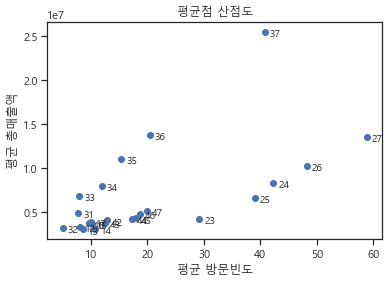

In [6]:
import matplotlib
import matplotlib.pyplot as plt 

X = np.hstack(평균방문빈도.values[0:4])
Y = np.hstack(평균총매출액.values[0:4])

#2. 한글깨짐현상 방지 
matplotlib.rcParams['font.family'] = 'Malgun Gothic' 

#3. 평균점 산점도 그리기
labels = []
for i in range(1,5,1):
    for j in range(1,8,1):
        labels.append(str(i)+str(j))

for label, x_count, y_count in zip(labels, X, Y):
    plt.annotate(label,
xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5) ) 

plt.title('평균점 산점도') #차트 제목
plt.xlabel('평균 방문빈도') # X축 이름
plt.ylabel('평균 총매출액') # Y축 이름
plt.plot(X, Y,'o')

## 10.5 공분산분석

### 분석 시나리오

앞서 거주지역별 총 매출액의 차이가 있는지 일원분산분석을 통해 검증한 적이 있다. 그러나, 총매출액에는 거주지역뿐만 아니라, 고객들의 방문빈도 역시 유의미한 변수일 수 있다. 공분산분석을 통해 방문빈도를 통제한 상태에서 거주지역별 총 매출액의 차이를 검정해보자. 

#### H0 (귀무가설)= 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 없다.
#### H1 (연구가설)= 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 있다.

In [7]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import pingouin as pg

df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
df1=df[['총_매출액','방문빈도','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

#2. 공분산분석
print('공분산분석 결과\n', pg.ancova(dv='총_매출액', between='거주지역',covar='방문빈도', data=df1))

#3. 일원분산분석
print('\n일원분산분석 결과\n', pg.anova(dv='총_매출액', between='거주지역', data=df1))

공분산분석 결과
      Source                    SS   DF       F  p-unc
0      거주지역   696696828775916.000    6   4.046  0.001
1      방문빈도 13701443685723456.000    1 477.393  0.000
2  Residual 28470960342015400.000  992     nan    nan

일원분산분석 결과
   Source  ddof1  ddof2      F  p-unc   np2
0   거주지역      6    993 24.759  0.000 0.130
